# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>

## Линтеры

Стиль кода является довольно важной вещью для соблюдения. Например, именно стиль кода помогает в __командной работе__, способствует _более лёгкому чтению кода_, важность чего возрастает по мере присоединения новых участников к команде. Для Python стандартом является PEP 8, более полную и официальную информацию можно прочитать здесь: <a href="https://peps.python.org/pep-0008/" target="_blank">https://peps.python.org/pep-0008/</a>.

Перечислим кратко основные правила, которые касаются оформления кода на нашем курсе:

* Отступы составляют ровно 4 пробела, табуляции не используются. К слову, в Питоне нет ключевых слов по типу `{` и `}` в C и `begin` и `end` в Паскале. Блоки кода разделяются пробелами.
* Все переменные должны иметь понятные названия и состоять только из строчных букв. Например, вместо того, чтобы назвать выборку как `X`, лучше назвать ее `sample`. В качестве разделителей используйте подчеркивания. В редких случаях можно и отступать от этого правила, если обозначения понятны из решаемой задачи.
* Вокруг всех знаков арифметических операций, присваивания и пр. обязательны пробелы с двух сторон. Исключение — запись вида `a=b` в аргументах функции. Примеры будут далее.
* Разделяйте логические куски программы пустыми строками. Вряд ли вы сможете написать код строк на 10-15, в который нельзя вставить ни одну пустую строку, разделяющую код на логические части. __Перед__ всеми логическими кусками кода должен быть комментарий к этому куску кода.
* Все функции (кроме самых маленьких) должны содержать подробную документацию, написанную по правилам оформления документаций.
* Если комментарий дается на строке с кодом, то оформить его стоит так:

`код [ровно 2 пробела] # [ровно 1 пробел] комментарий`

* Если комментарий дается на отдельной строке, то он должен иметь тот же отступ, что и строка кода под ним. Скорее всего перед таким комментарием можно вставить пустую строку.
* Не нужно комментировать очевидное.
* __Крайне важно:__ не нужно писать весь код в одной ячейке ноутбука!
* Не стоит создавать вермишель ячеек &mdash; несколько подряд идущих ячеек с 1-3 строками кода, если в этом нет необходимости.
* Если есть возможность, при выводе десятичных чисел следует оставлять разумное число знаков после запятой.

Отдельно стоит отметить, что код должен быть понятен проверяющему.
В частности, должны использоваться понятные названия переменных и присутствовать подробные комментарии.
**Если проверяющий не поймет код, оценка за задание может быть снижена.**

Кроме того, _все ноутбуки, которые присылаются в бот, проходят проверку **линтером**._ С помощью линтера происходит _статический анализ_ кода на предмет соответствия стилю кода. Линтеры **крайне полезны** в командной работе, особенно в больших компаниях. В части компаний код _не сможет пойти в «прод»_, если он _не пройдёт проверку линтером_.

Одним из популярных средств для этого является <a href="https://pypi.org/project/black/" target="_blank">Black</a>. Чтобы с помощью него можно было проверять ноутбуки, его нужно устанавливать следующим образом: `pip install "black[jupyter]"`.

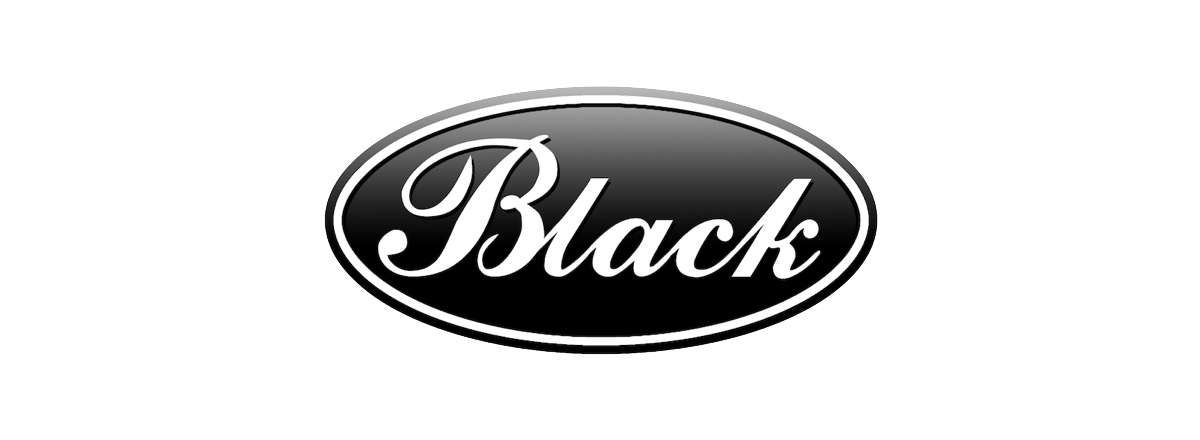

После установки можно реформатировать ноутбуки, например, `black test.ipynb -l 80`. Можно указывать параметры командной строки:
- `-l`, `--line-length` — максимальная длина строки _(по умолчанию 88)_
- `--diff` — позволяет увидеть возможные изм
енения после применения
- `-v`, `--verbose` — показывает подробные сообщения, связанные с ходом работы линтера

Более подробно можно посмотреть в <a href="https://black.readthedocs.io/en/stable/usage_and_configuration/the_basics.html#command-line-options" target="_blank">документации</a>.

Кроме того, с помощью комментариев вида `# fmt: skip` _(для отдельных строк)_, а также `# fmt: off` в начале и `# fmt: on` в конце _(для блока подряд идущих строк)_ можно __защитить__ нужные строки кода от реформатирования. Можно смешивать с другими комментариями: например, `# fmt: skip # pylint # noqa`.

Линтер Black поддерживает интеграцию с такиими известными средами разработки, как Vim, Visual Studio Code и другие. Подробнее можно посмотреть в <a href="https://black.readthedocs.io/en/stable/integrations/editors.html" target="_blank">https://black.readthedocs.io/en/stable/integrations/editors.html</a>.

Рассмотрим примеры, как работает Black.

### 1. Пробелы и переносы строк

Black исправляет горизонтальные пробелы так, чтобы это было __совместимо__ с `pycodestyle`. Лучший сценарий для работы с переносами строк заключается в том, что выражение после исправления __помещается__ в одну строку с учётом ограничения на её длину.

In [1]:
# fmt: off

j = [1,
     2,
     3
]

# fmt: on

j = [1, 2, 3]

Если это не представляется возможным, то Black ищет пары открывающей и закрывающей скобок _(в приоритете внешние)_ и смотрит, возможен ли предыдущий сценарий с выражением внутри скобок.

In [ ]:
# fmt: off

ImportantClass.important_method(exc, limit, lookup_lines, capture_locals, extra_argument)

# fmt: on

ImportantClass.important_method(
    exc, limit, lookup_lines, capture_locals, extra_argument
)

Если невозможно с одной парой скобок, то выбирается следующая. Элементы, разделённые запятыми, Black старается сохранить на одной строке. Если и это невозможно, то Black выносит каждый из этих элементов на отдельную строку.

In [ ]:
# fmt: off

def very_important_function(template: str, *variables, file: os.PathLike, engine: str, header: bool = True, debug: bool = False):
    """Applies `variables` to the `template` and writes to `file`."""
    with open(file, 'w') as f:
        ...

# fmt: on


def very_important_function(
    template: str,
    *variables,
    file: os.PathLike,
    engine: str,
    header: bool = True,
    debug: bool = False,
):
    """Applies `variables` to the `template` and writes to `file`."""
    with open(file, "w") as f:
        ...

### 2. Приоритеты символов

Для Black предпочтительнее использовать __скобки__, чем __обратные косые черты (backslashes)__, которые при обработке Black удаляются.

In [ ]:
# fmt: off

if some_short_rule1 \
  and some_short_rule2:
      ...

# fmt: on

if some_short_rule1 and some_short_rule2:
    ...


# fmt: off

if some_long_rule1 \
  and some_long_rule2:
    ...

# fmt: on

if some_long_rule1 and some_long_rule2:
    ...

### 3. Иные свойства

Кроме того, Black позволяет более экономно использовать пустые строки, например:

In [ ]:
# fmt: off

def foo():

    print("All the newlines above me should be deleted!")


if condition:

    print("No newline above me!")

    print("There is a newline above me, and that's OK!")


class Point:

    x: int
    y: int

# fmt: on


def foo():
    print("All the newlines above me should be deleted!")


if condition:
    print("No newline above me!")

    print("There is a newline above me, and that's OK!")


class Point:
    x: int
    y: int

Black соблюдает правила, связанные с комментариями, например:
`код [ровно 2 пробела] # [ровно 1 пробел] комментарий`. 

Для Black предпочтительнее __двойные__ кавычки, чем одинарные. Кроме того, соблюдаются правила про пробелы вокруг операторов.

### 4. Задание

Время экспериментов!

- Напишите произвольный код на Python, содержащий _скобки_, _арифметические операторы_, _кавычки_, _пустые строки_ и __всё остальное, что вы захотите__.
- Сохраните либо код, либо ноутбук в отдельный файл: `test.py`, `test.ipynb`.
- Запустите Black: `black test.py`. Какие изменения вы можете заметить?